In [6]:
# http://scikit-learn.org/stable/modules/decomposition.html
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
# https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
# https://intoli.com/blog/pca-and-svd/
# https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/04.1-Dimensionality-PCA.ipynb
# http://sebastianraschka.com/Articles/2014_python_lda.html#a-comparison-of-pca-and-lda
# http://sebastianraschka.com/Articles/2014_pca_step_by_step.html


# PCA vs SVD https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca

In [8]:
# import the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
# import our plotting module
import matplotlib.pyplot as plt
%matplotlib inline

# load the Iris dataset
iris = load_iris()

In [9]:
# seperate the features and response variable
iris_X, iris_y = iris.data, iris.target

In [10]:
# the names of the flower we are trying to predict.
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [11]:
# Names of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [390]:
# for labelling: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(
    range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

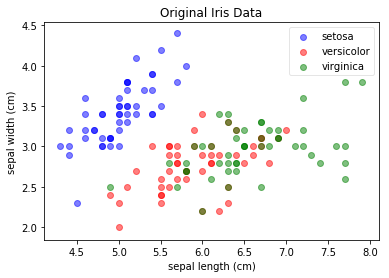

In [391]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

In [32]:
# Calculate a PCA manually

# import numpy
import numpy as np

# calculate the mean vector
mean_vector = iris_X.mean(axis=0)
print mean_vector

# calculate the covariance matrix
cov_mat = np.cov((iris_X).T)
print cov_mat.shape

[ 5.84333333  3.054       3.75866667  1.19866667]
(4, 4)


In [33]:
cov_mat

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [34]:
# calculate the eigenvectors and eigenvalues of our covariance matrix of the iris dataset
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# Print the eigen vectors and corresponding eigenvalues
# in order of descending eigenvalues
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print 'Eigenvector {}: \n{}'.format(i+1, eigvec_cov)
    print 'Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i])
    print 30 * '-'

Eigenvector 1: 
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
Eigenvalue 1 from covariance matrix: 4.22484076832
------------------------------
Eigenvector 2: 
[-0.65653988 -0.72971237  0.1757674   0.07470647]
Eigenvalue 2 from covariance matrix: 0.242243571628
------------------------------
Eigenvector 3: 
[-0.58099728  0.59641809  0.07252408  0.54906091]
Eigenvalue 3 from covariance matrix: 0.0785239080942
------------------------------
Eigenvector 4: 
[ 0.31725455 -0.32409435 -0.47971899  0.75112056]
Eigenvalue 4 from covariance matrix: 0.023683027126
------------------------------


In [35]:
# the percentages of the variance captured by each eigenvalue
# is equal to the eigenvalue of that components divided by
# the sum of all eigen values
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

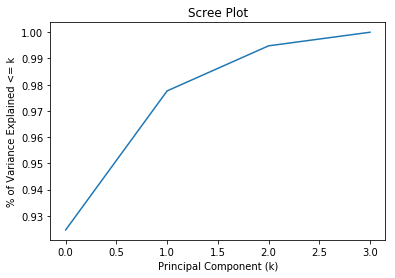

In [36]:
# Scree Plot

plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

In [37]:
# store the top two eigenvectors in a variable
top_2_eigenvectors = eig_vec_cov[:,:2].T

# show the transpose so that each row is a principal component, we have two rows == two components
top_2_eigenvectors

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [38]:
# to transform our data from having shape (150, 4) to (150, 2)
# we will multiply the matrices of our data and our eigen vectors together
# notice how I am centering the data first. I am doing this to replicate how scikit-learn PCA's algorithm functions
np.dot(iris_X, top_2_eigenvectors.T)[:5,]

array([[ 2.82713597, -5.64133105],
       [ 2.79595248, -5.14516688],
       [ 2.62152356, -5.17737812],
       [ 2.7649059 , -5.00359942],
       [ 2.78275012, -5.64864829]])

In [39]:
# scikit-learn's version of PCA
from sklearn.decomposition import PCA

In [40]:
# Like any other sklearn module, we first instantiate the class
pca = PCA(n_components=2)

In [41]:
# fit the PCA to our data
pca.fit(iris_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
pca.components_
# note that the second column is the negative of the manual process
# this is because eignevectors can be positive or negative
# It should have little to no effect on our machine learning pipelines


array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [43]:
# sklearn PCA centers the data first while transforming, so these numbers won't match our manual process.
pca.transform(iris_X)[:5,]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [44]:
# manually centering our data to match scikit-learn's implementation of PCA
np.dot(iris_X-mean_vector, top_2_eigenvectors.T)[:5,]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456]])

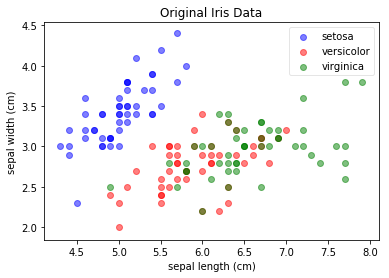

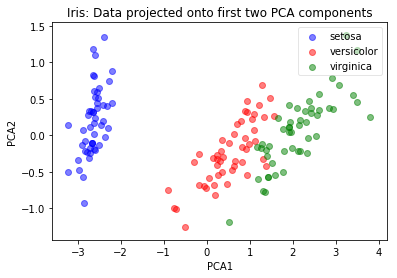

In [45]:
# Plot the original and projected data
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()
plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [46]:
# percentage of variance in data explained by each component
# same as what we calculated earlier

pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [47]:
# show how pca attempts to eliminate dependence between columns

# capture all four principal components
full_pca = PCA(n_components=4)

# fit our PCA to the iris dataset
full_pca.fit(iris_X)

# show the correlation matrix of the original dataset
np.corrcoef(iris_X.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [48]:
# correlation coefficients above the diagonal
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.10936925,  0.87175416,  0.81795363, -0.4205161 , -0.35654409])

In [49]:
# average correlation of original iris dataset.
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

0.16065567094168495

In [50]:
pca_iris = full_pca.transform(iris_X)
# average correlation of PCAed iris dataset.
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()
# VERY close to 0 because columns are independent from one another
# This is an important consequence of performing an eigen value decomposition

7.2640855025557061e-17

In [102]:
# import our scaling module
from sklearn.preprocessing import StandardScaler
# center our data, not a full scaling
X_centered = StandardScaler(with_std=False).fit_transform(iris_X)

X_centered[:5,]

array([[-0.74333333,  0.446     , -2.35866667, -0.99866667],
       [-0.94333333, -0.054     , -2.35866667, -0.99866667],
       [-1.14333333,  0.146     , -2.45866667, -0.99866667],
       [-1.24333333,  0.046     , -2.25866667, -0.99866667],
       [-0.84333333,  0.546     , -2.35866667, -0.99866667]])

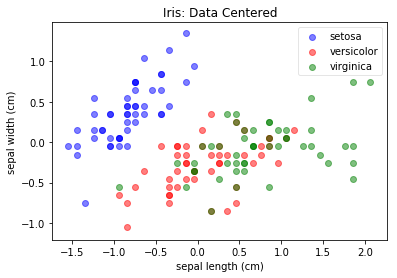

In [52]:
# Plot our centered data
plot(X_centered, iris_y, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

In [53]:
# fit our PCA (with n_components still set to 2) on our centered data
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
# same components as before
pca.components_  

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [55]:
# same projection when data are centered because PCA does this automatically
pca.transform(X_centered)[:5,]  

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

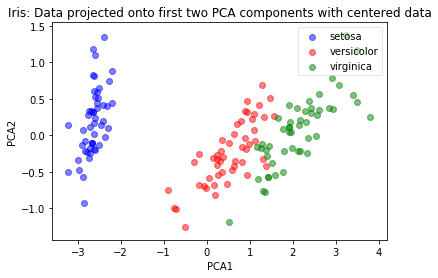

In [56]:
# Plot PCA projection of centered data, same as previous PCA projected data
plot(pca.transform(X_centered), iris_y, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

In [57]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [58]:
# doing a normal z score scaling
X_scaled = StandardScaler().fit_transform(iris_X)

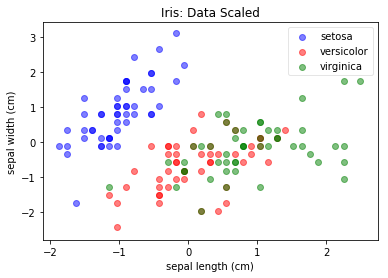

In [59]:
# Plot scaled data
plot(X_scaled, iris_y, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

In [60]:
# fit our 2-dimensional PCA on our scaled data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
# different components as cenetered data
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [63]:
# different projection when data are scaled
pca.transform(X_scaled)[:5,]  

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [64]:
# percentage of variance in data explained by each component
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

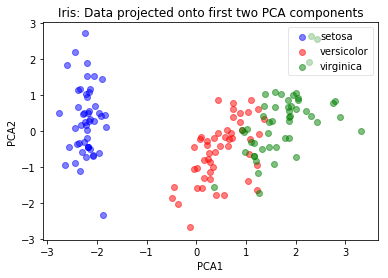

In [61]:
# Plot PCA projection of scaled data
plot(pca.transform(X_scaled), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [65]:
# how to interpret and use components
pca.components_  # a 2 x 4 matrix

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [112]:
first_scaled_flower

array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673])

In [66]:
# Multiply original matrix (150 x 4) by components transposed (4 x 2) to get new columns (150 x 2)
np.dot(X_scaled, pca.components_.T)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [109]:
# extract the first row of our scaled data
first_scaled_flower = X_scaled[0]
# extract the two PC's
first_Pc = pca.components_[0]
second_Pc = pca.components_[1]

first_scaled_flower.shape  # (4,)

# same result as the first row of our matrix multiplication
np.dot(first_scaled_flower, first_Pc), np.dot(first_scaled_flower, second_Pc)

(-2.2645417283949003, 0.50570390277378274)

In [67]:
# This is how the transform method works in pca
pca.transform(X_scaled)[:5,]

array([[-2.26454173,  0.5057039 ],
       [-2.0864255 , -0.65540473],
       [-2.36795045, -0.31847731],
       [-2.30419716, -0.57536771],
       [-2.38877749,  0.6747674 ]])

In [ ]:
# visualize PCA components

In [68]:
# cut out last two columns of the original iris dataset
iris_2_dim = iris_X[:,2:4]

# center the data
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)

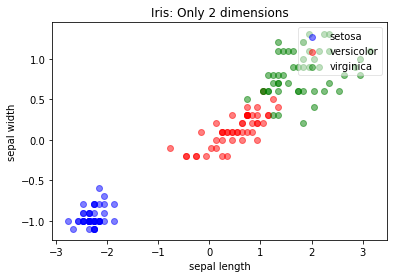

In [114]:
plot(iris_2_dim, iris_y, "Iris: Only 2 dimensions", "sepal length", "sepal width")

In [115]:
# instantiate a PCA of 2 components
twodim_pca = PCA(n_components=2)

# fit and transform our truncated iris data
iris_2_dim_transformed = twodim_pca.fit_transform(iris_2_dim)

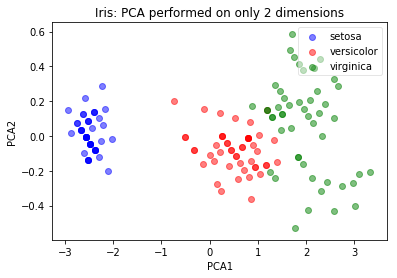

In [116]:
plot(iris_2_dim_transformed, iris_y, "Iris: PCA performed on only 2 dimensions", "PCA1", "PCA2")

[(-1, 1),
 (-3, 3),

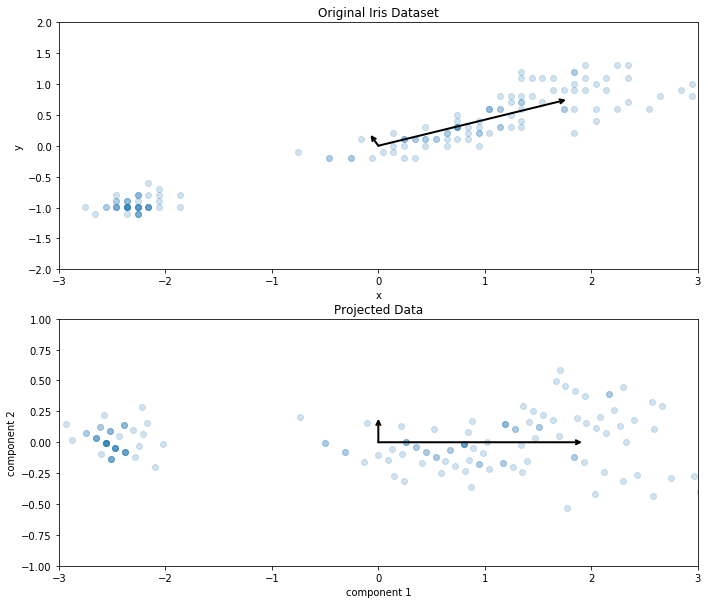

In [140]:
# This code is graphing both the original iris data and the projected version of it using PCA.
# Moreover, on each graph, the principal components are graphed as vectors on the data themselves
# The longer of the arrows is meant to describe the first principal component and
# the shorter of the arrows describes the second principal component
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    v = vector * np.sqrt(length)  # elongdate vector to match up to explained_variance
    draw_vector(twodim_pca.mean_, 
                twodim_pca.mean_ + v, ax=ax[0])
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-2, 2))


ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    transformed_component = twodim_pca.transform([vector])[0]  # transform components to new coordinate system
    v = transformed_component * np.sqrt(length)  # elongdate vector to match up to explained_variance
    draw_vector(iris_2_dim_transformed.mean(axis=0),
                iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='Projected Data',
          xlim=(-3, 3), ylim=(-1, 1))

In [141]:
# LDA is better than PCA for classification

In [415]:
# calculate the mean for each class
# to do this we will separate the iris dataset into three dataframes
# one for each flower, then we will take one's mean columnwise
mean_vectors = []
for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y==cl], axis=0)
    mean_vectors.append(class_mean_vector)
    print label_dict[cl], class_mean_vector

setosa [ 5.006  3.418  1.464  0.244]
versicolor [ 5.936  2.77   4.26   1.326]
virginica [ 6.588  2.974  5.552  2.026]


In [422]:
# Calculate within-class scatter matrix
S_W = np.zeros((4,4))
# for each flower
for cl,mv in zip([0, 1, 2], mean_vectors):
    # scatter matrix for every class, starts with all 0's
    class_sc_mat = np.zeros((4,4))  
    # for each row that describes the specific flower
    for row in iris_X[iris_y == cl]:
        # make column vectors 
        row, mv = row.reshape(4,1), mv.reshape(4,1) 
        # this is a 4x4 matrix
        class_sc_mat += (row-mv).dot((row-mv).T)
    # sum class scatter matrices
    S_W += class_sc_mat          
    
S_W

array([[ 38.9562,  13.683 ,  24.614 ,   5.6556],
       [ 13.683 ,  17.035 ,   8.12  ,   4.9132],
       [ 24.614 ,   8.12  ,  27.22  ,   6.2536],
       [  5.6556,   4.9132,   6.2536,   6.1756]])

In [423]:
# calculate the between-class scatter matrix

# mean of entire dataset
overall_mean = np.mean(iris_X, axis=0).reshape(4,1)

# will eventually become between class scatter matrix
S_B = np.zeros((4,4))
for i,mean_vec in enumerate(mean_vectors):  
    # number of flowers in each species
    n = iris_X[iris_y==i,:].shape[0]
    # make column vector for each specied
    mean_vec = mean_vec.reshape(4,1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

S_B

array([[  63.2121,  -19.534 ,  165.1647,   71.3631],
       [ -19.534 ,   10.9776,  -56.0552,  -22.4924],
       [ 165.1647,  -56.0552,  436.6437,  186.9081],
       [  71.3631,  -22.4924,  186.9081,   80.6041]])

In [429]:
# calculate eigenvalues and eigenvectors of S−1W x SB
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
eig_vecs = eig_vecs.real
eig_vals = eig_vals.real

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i]
    print 'Eigenvector {}: {}'.format(i+1, eigvec_sc)
    print 'Eigenvalue {:}: {}'.format(i+1, eig_vals[i])
    print

Eigenvector 1: [-0.2049 -0.3871  0.5465  0.7138]
Eigenvalue 1: 32.2719577997

Eigenvector 2: [ 0.009   0.589  -0.2543  0.767 ]
Eigenvalue 2: 0.27756686384

Eigenvector 3: [ 0.2771 -0.3863 -0.4388  0.6644]
Eigenvalue 3: -6.73276389619e-16

Eigenvector 4: [ 0.2771 -0.3863 -0.4388  0.6644]
Eigenvalue 4: -6.73276389619e-16



In [398]:
# keep the top two linear discriminants
linear_discriminants = eig_vecs.T[:2]

linear_discriminants

array([[-0.2049, -0.3871,  0.5465,  0.7138],
       [ 0.009 ,  0.589 , -0.2543,  0.767 ]])

In [400]:
#explained variance ratios
eig_vals / eig_vals.sum()

array([  9.9147e-01,   8.5275e-03,  -2.0685e-17,  -2.0685e-17])

In [399]:
# LDA projected data

lda_iris_projection = np.dot(iris_X, linear_discriminants.T)

lda_iris_projection[:5,]

array([[-1.4922,  1.9047],
       [-1.2577,  1.6084],
       [-1.3488,  1.7498],
       [-1.1802,  1.6392],
       [-1.5104,  1.9627]])

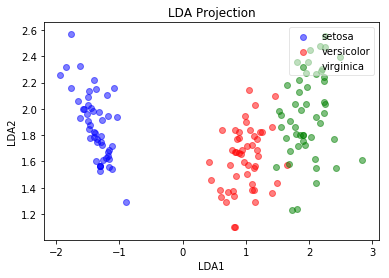

In [406]:
plot(lda_iris_projection, iris_y, "LDA Projection", "LDA1", "LDA2")

In [402]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

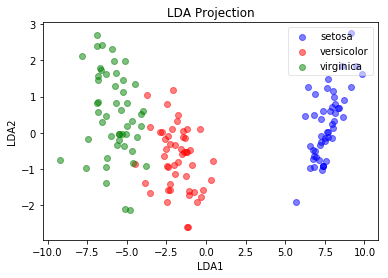

In [403]:
# instantiate the LDA module
lda = LinearDiscriminantAnalysis(n_components=2)

# fit and transform our original iris data
X_lda_iris = lda.fit_transform(iris_X, iris_y)

# plot the projected data
plot(X_lda_iris, iris_y, "LDA Projection", "LDA1", "LDA2")

In [440]:
# show that the sklearn components are just a scalar multiplication from the manual components we calculateda
for manual_component, sklearn_component in zip(eig_vecs.T[:2], lda.scalings_.T):
    print sklearn_component / manual_component

[-3.9982 -3.9982 -3.9982 -3.9982]
[ 3.6583  3.6583  3.6583  3.6583]


In [404]:
# same as manual calculations
lda.explained_variance_ratio_

array([ 0.9915,  0.0085])

In [382]:
# essentially the same as pca.components_, but transposed (4x2 instead of 2x4)
lda.scalings_  

array([[ 0.8193,  0.0329],
       [ 1.5479,  2.1547],
       [-2.1849, -0.9302],
       [-2.8539,  2.806 ]])

In [206]:
# fit our LDA to scaled data
X_lda_iris = lda.fit_transform(X_scaled, iris_y)

In [207]:
lda.scalings_  # different scalings when data are scaled

array([[ 0.67614337,  0.0271192 ],
       [ 0.66890811,  0.93115101],
       [-3.84228173, -1.63586613],
       [-2.17067434,  2.13428251]])

In [157]:
# LDA1 is the best axis for SEPERATING the classes

In [211]:
# fit our LDA to our truncated iris dataset
iris_2_dim_transformed_lda = lda.fit_transform(iris_2_dim, iris_y)

In [220]:
# project data
iris_2_dim_transformed_lda[:5,]

array([[-6.04248571,  0.07027756],
       [-6.04248571,  0.07027756],
       [-6.19690803,  0.28598813],
       [-5.88806338, -0.14543302],
       [-6.04248571,  0.07027756]])

In [221]:
# different notation
components = lda.scalings_.T  # transposing to get same usage as PCA. I want the rows to be our components
print components

np.dot(iris_2_dim, components.T)[:5,]  # same as transform method

[[ 1.54422328  2.40338224]
 [-2.15710573  5.02431491]]


array([[-6.04248571,  0.07027756],
       [-6.04248571,  0.07027756],
       [-6.19690803,  0.28598813],
       [-5.88806338, -0.14543302],
       [-6.04248571,  0.07027756]])

In [218]:
np.corrcoef(iris_2_dim.T)  # original features are highly correllated

array([[ 1.       ,  0.9627571],
       [ 0.9627571,  1.       ]])

In [219]:
# new LDA features are highly uncorrellated, like in PCA
np.corrcoef(iris_2_dim_transformed_lda.T)  

array([[  1.00000000e+00,   1.03227536e-15],
       [  1.03227536e-15,   1.00000000e+00]])

[(-3, 3),
 (-10, 10),

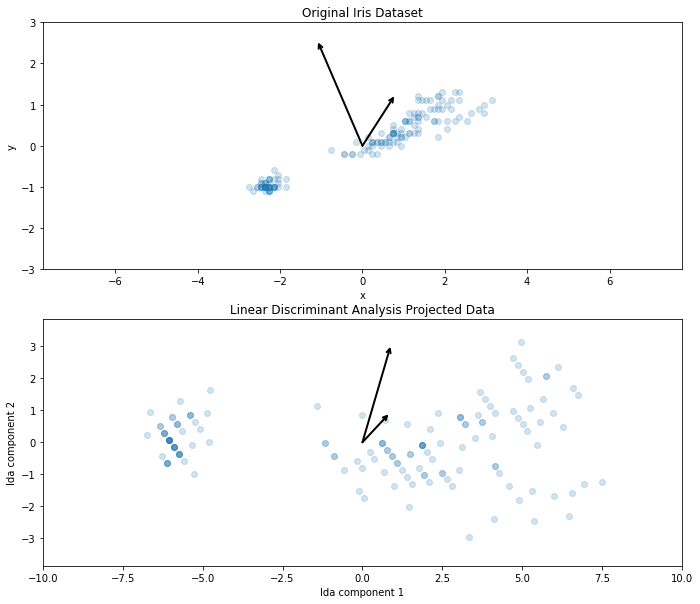

In [216]:
# This code is graphing both the original iris data and the projected version of it using LDA.
# Moreover, on each graph, the scalings of the LDA are graphed as vectors on the data themselves
# The longer of the arrows is meant to describe the first scaling vector and
# the shorter of the arrows describes the second scaling vector
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    v = vector * .5
    draw_vector(lda.xbar_, lda.xbar_ + v, ax=ax[0])  # lda.xbar_ is equivalent to pca.mean_
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-3, 3))

ax[1].scatter(iris_2_dim_transformed_lda[:, 0], iris_2_dim_transformed_lda[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    transformed_component = lda.transform([vector])[0]
    v = transformed_component * .1
    draw_vector(iris_2_dim_transformed_lda.mean(axis=0), iris_2_dim_transformed_lda.mean(axis=0) + v, ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='lda component 1', ylabel='lda component 2',
          title='Linear Discriminant Analysis Projected Data',
          xlim=(-10, 10), ylim=(-3, 3))

In [223]:
# notice how the component, instead of going with the variance of the data
# goes almost perpendicular to it, its following the seperation of the classes instead
# note how its almost parallel with the gap between the flowers on the left and right side
# LDA is trying to capture the separation between classes

In [224]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [225]:
# Create a PCA module to keep a single component
single_pca = PCA(n_components=1)

# Create a LDA module to keep a single component
single_lda = LinearDiscriminantAnalysis(n_components=1)

# Instantiate a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

In [236]:
# run a cross validation on the KNN without any feature transformation
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

# This is a baseline accuracy. If we did nothing, KNN on its own achieves a 98% accuracy
knn_average

0.98039215686274517

In [244]:
%%timeit
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

100 loops, best of 3: 6.19 ms per loop


In [251]:
# create a pipeline that performs PCA
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])

pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()

pca_average

0.8941993464052288

In [252]:
%%timeit 
cross_val_score(pca_pipeline, iris_X, iris_y).mean()

100 loops, best of 3: 11.4 ms per loop


In [253]:
lda_pipeline = Pipeline([('lda', single_lda), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# better prediction accuracy than PCA by a good amount, but not as good as original
lda_average

0.9673202614379085

In [254]:
%%timeit 
cross_val_score(lda_pipeline, iris_X, iris_y).mean()

100 loops, best of 3: 11.3 ms per loop


In [255]:
# LDA is much better at creating axes for classification purposes

In [256]:
# try LDA with 2 components
lda_pipeline = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=2)), 
                         ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# Just as good as using original data
lda_average

0.98039215686274517

In [257]:
%%timeit
cross_val_score(lda_pipeline, iris_X, iris_y).mean()

100 loops, best of 3: 11 ms per loop


In [449]:
# compare our feature transformation tools to a feature selection tool
from sklearn.feature_selection import SelectKBest
# try all possible values for k, excluding keeping all columns
for k in [1, 2, 3]:
    # make the pipeline
    select_pipeline = Pipeline([('select', SelectKBest(k=k)), ('knn', knn)])
    # cross validate the pipeline
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print k, "best feature has accuracy:", select_average
    
# LDA is even better than the best selectkbest

1 best feature has accuracy: 0.953839869281
2 best feature has accuracy: 0.960784313725
3 best feature has accuracy: 0.97385620915


In [259]:
%%timeit
cross_val_score(select_pipeline, iris_X, iris_y).mean()

100 loops, best of 3: 11.7 ms per loop


In [7]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,           # the model to grid search
                        params,          # the parameter set to try 
                        error_score=0.)  # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y)           # fit the model and parameters
    # our classical metric for performance
    print "Best Accuracy: {}".format(grid.best_score_)
    # the best parameters that caused the best accuracy
    print "Best Parameters: {}".format(grid.best_params_)
    # the average time it took a model to fit to the data (in seconds)
    print "Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print "Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3))

In [447]:
from sklearn.model_selection import GridSearchCV
iris_params = {
                'preprocessing__scale__with_std': [True, False],
                'preprocessing__scale__with_mean': [True, False],
                'preprocessing__pca__n_components':[1, 2, 3, 4], 
                
                # according to scikit-learn docs, max allowed n_components for LDA is number of classes - 1
                'preprocessing__lda__n_components':[1, 2],  
                
                'clf__n_neighbors': range(1, 9)
              }
# make a larger pipeline
preprocessing = Pipeline([('scale', StandardScaler()), 
                          ('pca', PCA()), 
                          ('lda', LinearDiscriminantAnalysis())])


iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing), 
                                ('clf', KNeighborsClassifier())])


In [448]:
get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

Best Accuracy: 0.986666666667
Best Parameters: {'preprocessing__scale__with_std': False, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__lda__n_components': 2, 'clf__n_neighbors': 3}
Average Time to Fit (s): 0.002
Average Time to Score (s): 0.001


In [ ]:
# can't use PCA on sparse data..

In [ ]:
# http://scikit-learn.org/stable/modules/decomposition.html
# https://www.kaggle.com/datasf/case-data-from-san-f

In [203]:
import pandas as pd

In [204]:
hotel_reviews = pd.read_csv('../data/7282_1.csv')

In [205]:
hotel_reviews.shape

(35912, 19)

In [206]:
hotel_reviews.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


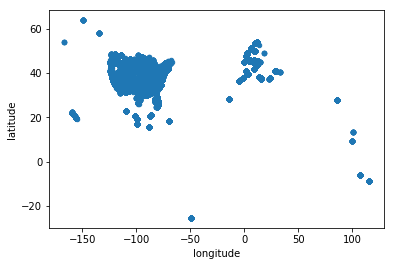

In [207]:
# Let's only include reviews from the US to try to only include english reviews

# plot the lats and longs of reviews
hotel_reviews.plot.scatter(x='longitude', y='latitude')

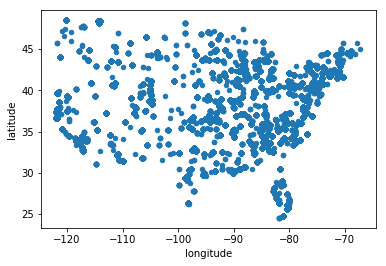

In [208]:
#Filter to only include datapoints within the US
hotel_reviews = hotel_reviews[((hotel_reviews['latitude']<=50.0) & (hotel_reviews['latitude']>=24.0)) & ((hotel_reviews['longitude']<=-65.0) & (hotel_reviews['longitude']>=-122.0))]

# Plot the lats and longs again
hotel_reviews.plot.scatter(x='longitude', y='latitude')
# Only looking at reviews that are coming from the US

In [209]:
hotel_reviews.shape

(30692, 19)

In [210]:
texts = hotel_reviews['reviews.text']

In [211]:
# import the sentence tokenizer from nltk
from nltk.tokenize import sent_tokenize
sent_tokenize("hello! I am Sinan. How are you??? I am fine")

['hello!', 'I am Sinan.', 'How are you???', 'I am fine']

In [212]:
sentences = reduce(lambda x, y:x+y, texts.apply(lambda x: sent_tokenize(str(x).decode('utf-8'))))

In [213]:
# the number of sentences
len(sentences)

118151

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')

tfidf_transformed = tfidf.fit_transform(sentences)

tfidf_transformed

<118151x280901 sparse matrix of type '<type 'numpy.float64'>'
	with 1180273 stored elements in Compressed Sparse Row format>

In [216]:
# try to fit PCA

PCA(n_components=1000).fit(tfidf_transformed)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
# can't work because it has to calculate a covariance matrix and to do that, the matrix needs to be dense

In [243]:
# we use another method in sklearn called Truncated SVD
# Truncated SVD uses a matrix trick to obtain the same components as PCA (when the data are scaled)
# and can work with sparse matrices

# components are a not exactly equal but they are up to a very precise decimal

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
pca = PCA(n_components=2)

# check if components of PCA and TruncatedSVD are same for a dataset
# by substracting the two matricies and seeing if, on average, the elements are very close to 0
print (pca.fit(iris_X).components_ - svd.fit(iris_X).components_).mean()  # not close to 0
# matrices are NOT the same

# check if components of PCA and TruncatedSVD are same for a centered dataset
print (pca.fit(X_centered).components_ - svd.fit(X_centered).components_).mean()  # close to 0
# matrices ARE the same

# check if components of PCA and TruncatedSVD are same for a scaled dataset
print (pca.fit(X_scaled).components_ - svd.fit(X_scaled).components_).mean()  # close to 0
# matrices ARE the same


0.130183123094
-2.42861286637e-17
-1.2490009027e-16


In [244]:
(pca.fit(X_centered).components_ - svd.fit(X_centered).components_).mean()

-6.4184768611141862e-17

In [245]:
svd = TruncatedSVD(n_components=1000)
svd.fit(tfidf_transformed)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

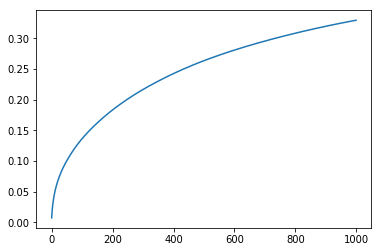

In [246]:
# Scree Plot

plt.plot(np.cumsum(svd.explained_variance_ratio_))

# 1,000 components captures about 30% of the variance

In [ ]:
# latent semantic analysis is a name given to the process of doing an SVD on sparse text document-term matricies
# It is done to find latent structure in text for the purposes of classification, clustering, etc

In [247]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [248]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
svd = TruncatedSVD(n_components=10)
normalizer = Normalizer()

lsa = Pipeline(steps=[('tfidf', tfidf), ('svd', svd), ('normalizer', normalizer)])

In [249]:
lsa.fit(sentences)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=Tru...10, n_iter=5,
       random_state=None, tol=0.0)), ('normalizer', Normalizer(copy=True, norm='l2'))])

In [250]:
lsa_sentences = lsa.transform(sentences)

lsa_sentences.shape

(118151, 10)

In [251]:
cluster = KMeans(n_clusters=10)

In [252]:
cluster.fit(lsa_sentences)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [294]:
%%timeit
# time it takes to cluster on the original document-term matrix of shape (118151, 280901)
cluster.fit(tfidf_transformed)

1 loop, best of 3: 4min 5s per loop


In [254]:
%%timeit
# also time the prediction phase of the Kmeans clustering
cluster.predict(tfidf_transformed)

10 loops, best of 3: 128 ms per loop


In [255]:
%%timeit
# time the time to cluster after latent semantic analysis of shape (118151, 10)
cluster.fit(lsa_sentences)
# over 80 times faster than fitting on the original tfidf dataset

1 loop, best of 3: 3.48 s per loop


In [256]:
%%timeit
# also time the prediction phase of the Kmeans clustering after LSA was performed
cluster.predict(lsa_sentences)
# over 4 times faster than predicting on the original tfidf dataset

10 loops, best of 3: 30.2 ms per loop


In [257]:
# transform texts to a cluster distance space
# each row represents an obsercation
cluster.transform(lsa_sentences).shape

(118151, 10)

In [258]:
predicted_cluster = cluster.predict(lsa_sentences)
predicted_cluster

array([1, 1, 1, ..., 4, 1, 3], dtype=int32)

In [259]:
# Distribution of "topics"
pd.Series(predicted_cluster).value_counts(normalize=True)

1    0.229071
7    0.163638
5    0.107532
4    0.087811
3    0.087067
0    0.085687
6    0.067498
2    0.065391
9    0.062183
8    0.044122
dtype: float64

In [260]:
# create DataFrame of texts and predicted topics
texts_df = pd.DataFrame({'text':sentences, 'topic':predicted_cluster})

In [261]:
texts_df.head()

,text,topic
0,to share your opinion of this businesswith YP ...,1
1,to share your opinion of this businesswith YP ...,1
2,to share your opinion of this businesswith YP ...,1
3,"We had a wonderful, relaxing time.",0
4,The staff were completely attentive and accomm...,6


In [262]:
print "Top terms per cluster:"
original_space_centroids = svd.inverse_transform(cluster.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = lsa.steps[0][1].get_feature_names()
for i in range(10):
    print "Cluster %d:" % i
    print ', '.join([terms[ind] for ind in order_centroids[i, :5]])
    print 

Top terms per cluster:
Cluster 0:
great, location, breakfast, hotel, stay

Cluster 1:
hotel, room, good, great, stay

Cluster 2:
stay, hotel, good, enjoyed stay, enjoyed

Cluster 3:
good, breakfast, breakfast good, room, great

Cluster 4:
clean, room clean, rooms, clean comfortable, hotel

Cluster 5:
hotel, recommend, good, recommend hotel, nice hotel

Cluster 6:
staff, friendly, staff friendly, helpful, friendly helpful

Cluster 7:
room, room clean, hotel, good, nice

Cluster 8:
comfortable, bed, clean comfortable, bed comfortable, room

Cluster 9:
nice, room, hotel, staff, breakfast



In [263]:
lsa.steps[0][1]

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

# PCA with the Labeled Faces in the Wild (LFW) people dataset

In [264]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

%matplotlib inline

/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [265]:
# load the dataset
# the optional parameter: min_faces_per_person: 
# will only retain pictures of people that have at least min_faces_per_person different pictures.
# the optional parameter: resize is the ratio used to resize the each face picture.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [266]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [267]:
# for machine learning we use the data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]

In [268]:
X.shape

(1288, 1850)

'Hugo Chavez'

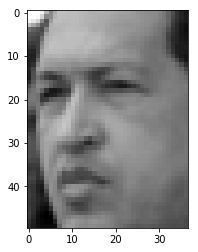

In [269]:
# plot one of the faces
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]

'Hugo Chavez'

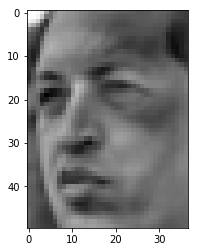

In [270]:
# plot one of the faces
plt.imshow(StandardScaler().fit_transform(X)[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]


'George W Bush'

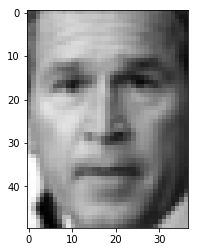

In [271]:
# let's plot another face
plt.imshow(X[100].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[100]]

In [272]:
# the label to predict is the id of the person
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [273]:
# let's split our dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [274]:
# Compute a PCA (eigenfaces) on the face dataset 
n_components = 200

"""
from sklearn docs:

The optional parameter whiten=True makes it possible to project the data onto the singular space 
while scaling each component to unit variance. This is often useful if the models down-stream make strong 
assumptions on the isotropy of the signal: this is for example the case for 
Support Vector Machines with the RBF kernel and the K-Means clustering algorithm.
"""

# instantiate the PCA module
pca = PCA(n_components=n_components, whiten=True)

# create a pipeline called preprocessing that will scale data and then apply PCA
preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca)])

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

# fit the pipeline to the training set
preprocessing.fit(X_train)

# grab the PCA from the pipeline
extracted_pca = preprocessing.steps[1][1]

# take the components from the PCA ( just like we did with iris )
# and reshape them to have the same height and weight as the original photos
eigenfaces = extracted_pca.components_.reshape((n_components, h, w))

Extracting the top 200 eigenfaces from 966 faces


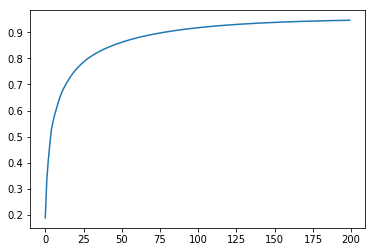

In [286]:
# Scree Plot

plt.plot(np.cumsum(extracted_pca.explained_variance_ratio_))

# starting at 100 components captures over 90% of the variance compared to the 1,850 original features

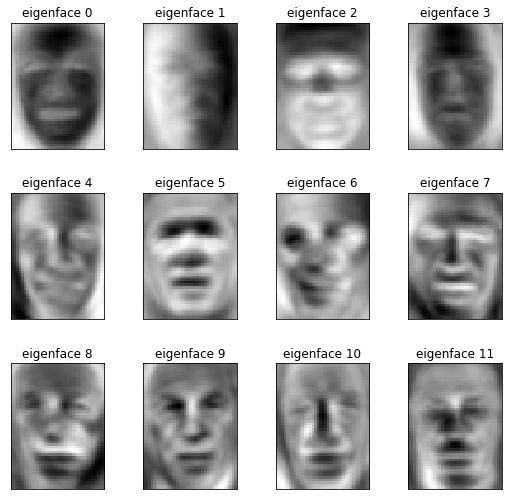

In [275]:
# This function is meant to plot several images in a gallery with given titles
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [276]:
# Use a pipeline to make this process easier
logreg = LogisticRegression()

# create the pipeline
face_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('logistic', logreg)])

In [277]:
print "fitting preprocessing pipeline to X_train and transforming X"

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

fitting preprocessing pipeline to X_train and transforming X


In [278]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints a more readable confusion matrix with heat labels and options for noramlization
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [279]:
param_grid = {'C': [1e-2, 1e-1,1e0,1e1, 1e2]}

0.813664596273 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.72      0.68      0.70        19
     Colin Powell       0.85      0.71      0.77        55
  Donald Rumsfeld       0.62      0.72      0.67        25
    George W Bush       0.88      0.91      0.89       142
Gerhard Schroeder       0.79      0.84      0.81        31
      Hugo Chavez       0.87      0.81      0.84        16
       Tony Blair       0.71      0.71      0.71        34

      avg / total       0.82      0.81      0.81       322

None
40.7 seconds to grid search and predict the test set


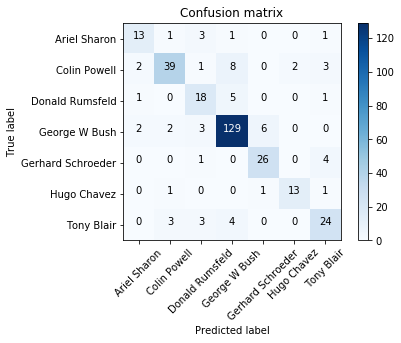

In [280]:
# fit without using PCA to see what the difference will be
t0 = time()

clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_

# Predicting people's names on the test set
y_pred = best_clf.predict(X_test)

print accuracy_score(y_pred, y_test), "Accuracy score for best estimator"
print(classification_report(y_test, y_pred, target_names=target_names))
print plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names)
print round((time() - t0), 1), "seconds to grid search and predict the test set"

0.819875776398 Accuracy score for best estimator
                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.74      0.76        19
     Colin Powell       0.75      0.71      0.73        55
  Donald Rumsfeld       0.81      0.68      0.74        25
    George W Bush       0.87      0.93      0.90       142
Gerhard Schroeder       0.81      0.84      0.83        31
      Hugo Chavez       0.86      0.75      0.80        16
       Tony Blair       0.73      0.71      0.72        34

      avg / total       0.82      0.82      0.82       322

None
2.8 seconds to grid search and predict the test set


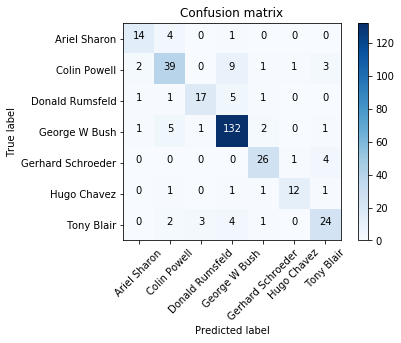

In [281]:
# now fit with PCA to see if our accuracy improves
t0 = time()

clf = GridSearchCV(logreg, param_grid)
clf = clf.fit(X_train_pca, y_train)
best_clf = clf.best_estimator_

# Predicting people's names on the test set
y_pred = best_clf.predict(X_test_pca)

print accuracy_score(y_pred, y_test), "Accuracy score for best estimator"
print(classification_report(y_test, y_pred, target_names=target_names))
print plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names)
print round((time() - t0), 1), "seconds to grid search and predict the test set"

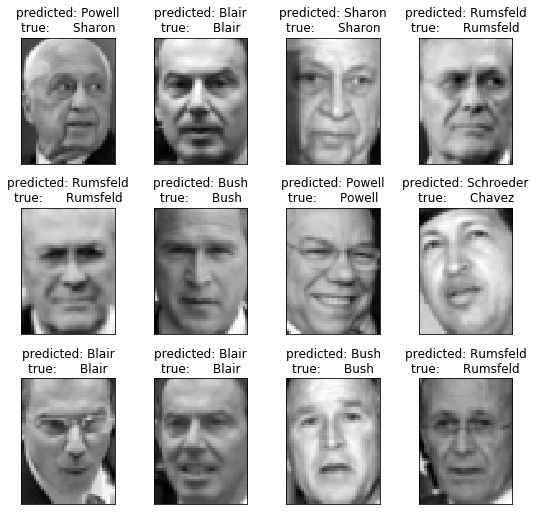

In [283]:
# get a list of predicted names and true names to plot with faces in test set
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

# splot a sample of the test set with predicted and true names
plot_gallery(X_test, prediction_titles, h, w)

In [284]:
# Create a larger pipeline to gridsearch
face_params = {'logistic__C':[1e-2, 1e-1, 1e0, 1e1, 1e2], 
               'preprocessing__pca__n_components':[100, 150, 200, 250, 300],
               'preprocessing__pca__whiten':[True, False],
               'preprocessing__lda__n_components':range(1, 7)  
               # [1, 2, 3, 4, 5, 6] recall the max allowed is n_classes-1
              }

pca = PCA()
lda = LinearDiscriminantAnalysis()

preprocessing = Pipeline([('scale', StandardScaler()), ('pca', pca), ('lda', lda)])

logreg = LogisticRegression()
face_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('logistic', logreg)])

In [285]:
get_best_model_and_accuracy(face_pipeline, face_params, X, y)

/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Best Accuracy: 0.835403726708
Best Parameters: {'logistic__C': 10.0, 'preprocessing__pca__n_components': 150, 'preprocessing__lda__n_components': 6, 'preprocessing__pca__whiten': False}
Average Time to Fit (s): 0.215
Average Time to Score (s): 0.009


In [ ]:
# much better than original data and very fast to predict and train!

In [ ]:
# talk about how these transformations are dope BUT they are predefined so we could learn new features 
# based on training data

# these predefined transformations might not work for a particular dataset 
# PCA is PCA no matter what dataset you choose to work with